<a href="https://colab.research.google.com/github/ORACHPAULFRANCIS/Personal-Practice-Projects/blob/Google-Colab-Commits/Loading_and_visualizing_las_files_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Lets install lasio
!pip install lasio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.6 MB/s eta 0:00:00


In [3]:
# Let us now go ahead and import all required libraries
import lasio
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# Let us read our las file
from google.colab import files
uploaded = files.upload()


Saving 49-005-37851.las to 49-005-37851 (1).las


In [9]:
las = lasio.read("49-005-37851.las")

In [11]:
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [12]:
las.sections['Version']

[HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS log ASCII Standa"),
 HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One Line per Depth Ste"),
 HeaderItem(mnemonic="CREA", unit="", value="02-08-2006", descr="LAS File Creat")]

In [15]:
for item in las.sections['Well']:
  print(f"{item.descr} ({item.mnemonic}): \t {item.value}")

START DEPTH (STRT): 	 8420.0
STOP DEPTH (STOP): 	 8714.0
STEP (STEP): 	 1.0
NULL VALUE (NULL): 	 -999.25
COMPANY (COMP): 	 Barrett Resources
WELL (WELL): 	 #31-6 Duvall
LOCATION (LOC): 	 NW NE 06-49N-69W
COUNTY (CNTY): 	 Campbell
FIELD (FLD): 	 
STATE (STAT): 	 Wyoming
COUNTRY (CTRY): 	 U.S.A.
COMPLETION DATE (MM/YY) (DATE): 	 01/00
API NUMBER (API): 	 49-005-37851-0000
SERVICE COMPANY (SRVC): 	 


In [17]:
las.sections['Well']['CTRY'] = 'United States of America'
for item in las.sections['Well']:
  print(f"{item.descr} ({item.mnemonic}): {item.value}")

START DEPTH (STRT): 8420.0
STOP DEPTH (STOP): 8714.0
STEP (STEP): 1.0
NULL VALUE (NULL): -999.25
COMPANY (COMP): Barrett Resources
WELL (WELL): #31-6 Duvall
LOCATION (LOC): NW NE 06-49N-69W
COUNTY (CNTY): Campbell
FIELD (FLD): 
STATE (STAT): Wyoming
COUNTRY (CTRY): United States of America
COMPLETION DATE (MM/YY) (DATE): 01/00
API NUMBER (API): 49-005-37851-0000
SERVICE COMPANY (SRVC): 


In [19]:
las.well.Well.value

'#31-6 Duvall'

In [21]:
for curve in las.curves:
  print(curve.mnemonic)

DEPT
DT
RESD
SP
GR


In [25]:
for count, item in enumerate(las.curves):
  print(f"Curve: {item.mnemonic} \t Unit: {item.unit} \t Description: {item.descr}")
print(f"The file has {count + 1} curves in it")

Curve: DEPT 	 Unit: F 	 Description: 1 DEPTH
Curve: DT 	 Unit: US/F 	 Description: 2 SONIC DELTA-T
Curve: RESD 	 Unit: OHMM 	 Description: 3 DEEP RESISTIVITY
Curve: SP 	 Unit: MV 	 Description: 4 SP CURVE
Curve: GR 	 Unit: GAPI 	 Description: 5 GAMMA RAY
The file has 5 curves in it


In [30]:
well = las.df()
well.head()

,DT,RESD,SP,GR
DEPT,,,,
8420.0,62.7,8.4,44.9,110.0
8421.0,63.1,8.4,44.9,122.0
8422.0,64.5,8.1,44.9,128.0
8423.0,64.3,7.9,44.7,118.0
8424.0,61.2,8.0,44.7,95.0


In [31]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 8420.0 to 8714.0
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      295 non-null    float64
 1   RESD    295 non-null    float64
 2   SP      295 non-null    float64
 3   GR      295 non-null    float64
dtypes: float64(4)
memory usage: 11.5 KB


In [32]:
well.describe()

,DT,RESD,SP,GR
count,295.000000,295.000000,295.000000,295.000000
mean,58.242712,2149.987797,-2.984068,58.267797
std,8.254717,8975.074174,85.323678,46.316636
min,44.100000,2.600000,-164.500000,0.000000
25%,50.000000,7.700000,29.400000,26.000000
50%,60.700000,18.700000,38.500000,40.000000
75%,64.550000,138.000000,44.600000,100.000000
max,74.200000,49131.000000,57.100000,192.000000


<Axes: xlabel='DEPT'>

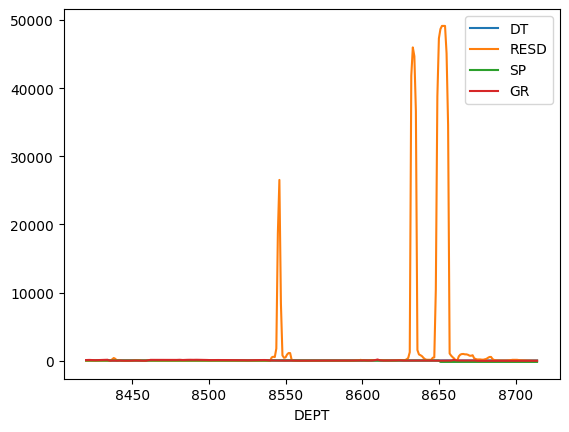

In [33]:
well.plot()

array([[<Axes: xlabel='DEPT'>, <Axes: xlabel='DEPT'>],
       [<Axes: xlabel='DEPT'>, <Axes: xlabel='DEPT'>],
       [<Axes: xlabel='DEPT'>, <Axes: xlabel='DEPT'>],
       [<Axes: xlabel='DEPT'>, <Axes: xlabel='DEPT'>]], dtype=object)

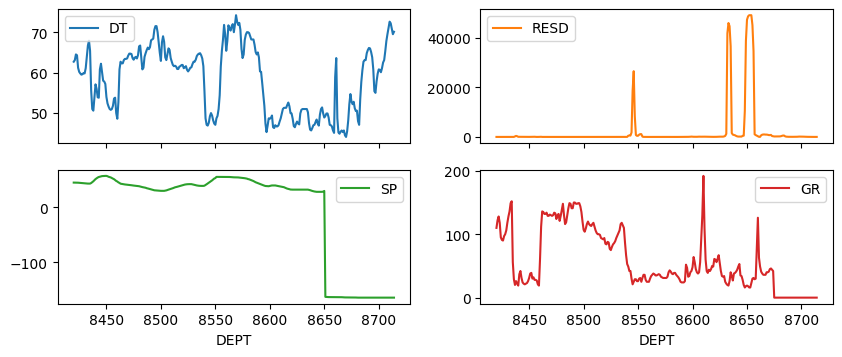

In [41]:
well.plot(figsize=(10, 8), subplots=True, layout=(4, 2), sharex=True)

<Axes: title={'center': 'Gamma Ray'}, xlabel='DEPT', ylabel='Gamma Ray (API)'>

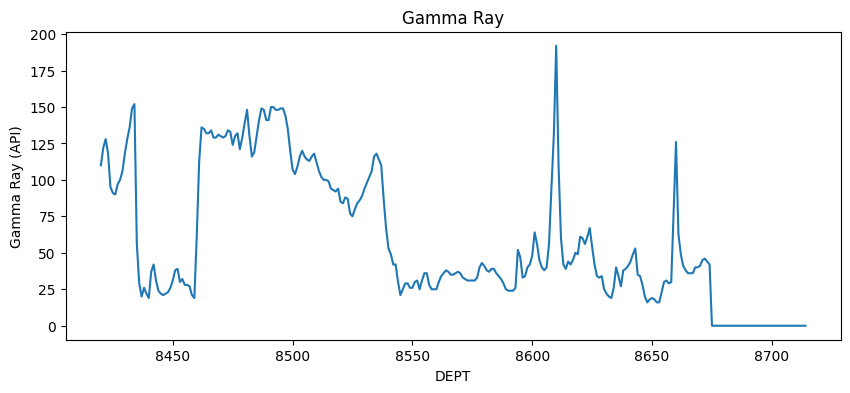

In [39]:
well['GR'].plot(figsize=(10, 4), title='Gamma Ray', ylabel='Gamma Ray (API)')

<Axes: title={'center': 'Deep Resistivity'}, xlabel='DEPT', ylabel='RESD (OHMM)'>

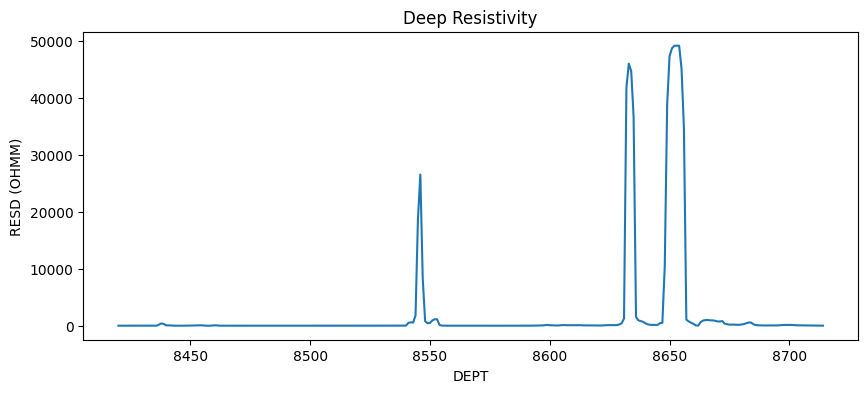

In [44]:
well['RESD'].plot(figsize=(10, 4), title='Deep Resistivity', ylabel='RESD (OHMM)')